In [1]:
#importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [61]:
# !pip install imblearn

In [2]:
#importing the dataset
# DATA_PATH = "../input/fertilizer-prediction/Fertilizer Prediction.csv"
DATA_PATH = "./Fertilizer Prediction.csv"
data = pd.read_csv(DATA_PATH)
data.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [63]:
data.shape

(99, 9)

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Soil Type        99 non-null     object
 4   Crop Type        99 non-null     object
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8   Fertilizer Name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB


In [4]:
#changing the column names
data.rename(columns={'Humidity ':'Humidity','Soil Type':'Soil_Type','Crop Type':'Crop_Type','Fertilizer Name':'Fertilizer'},inplace=True)

In [6]:
data['Soil_Type'].unique()

array(['Sandy', 'Loamy', 'Black', 'Red', 'Clayey'], dtype=object)

In [7]:
data['Crop_Type'].unique()

array(['Maize', 'Sugarcane', 'Cotton', 'Tobacco', 'Paddy', 'Barley',
       'Wheat', 'Millets', 'Oil seeds', 'Pulses', 'Ground Nuts'],
      dtype=object)

In [66]:
#checking unique values
data.nunique()

Temparature    14
Humidity       13
Moisture       41
Soil_Type       5
Crop_Type      11
Nitrogen       24
Potassium      13
Phosphorous    32
Fertilizer      7
dtype: int64

In [67]:
#checking for null values
data.isna().sum()

Temparature    0
Humidity       0
Moisture       0
Soil_Type      0
Crop_Type      0
Nitrogen       0
Potassium      0
Phosphorous    0
Fertilizer     0
dtype: int64

In [68]:
#statistical parameters
data.describe(include='all')

,Temparature,Humidity,Moisture,Soil_Type,Crop_Type,Nitrogen,Potassium,Phosphorous,Fertilizer
count,99.000000,99.000000,99.000000,99,99,99.000000,99.000000,99.000000,99
unique,NaN,NaN,NaN,5,11,NaN,NaN,NaN,7
top,NaN,NaN,NaN,Loamy,Sugarcane,NaN,NaN,NaN,Urea
freq,NaN,NaN,NaN,21,13,NaN,NaN,NaN,22
mean,30.282828,59.151515,43.181818,NaN,NaN,18.909091,3.383838,18.606061,NaN
std,3.502304,5.840331,11.271568,NaN,NaN,11.599693,5.814667,13.476978,NaN
min,25.000000,50.000000,25.000000,NaN,NaN,4.000000,0.000000,0.000000,NaN
25%,28.000000,54.000000,34.000000,NaN,NaN,10.000000,0.000000,9.000000,NaN
50%,30.000000,60.000000,41.000000,NaN,NaN,13.000000,0.000000,19.000000,NaN
75%,33.000000,64.000000,50.500000,NaN,NaN,24.000000,7.500000,30.000000,NaN


In [69]:
print( "Fertilizer : " ,data["Fertilizer"].unique(),'\n')
print("Crops Types : " , data["Crop_Type"].unique(),'\n')
print("Soil Types : " , data["Soil_Type"].unique(),'\n')

Fertilizer :  ['Urea' 'DAP' '14-35-14' '28-28' '17-17-17' '20-20' '10-26-26'] 

Crops Types :  ['Maize' 'Sugarcane' 'Cotton' 'Tobacco' 'Paddy' 'Barley' 'Wheat' 'Millets'
 'Oil seeds' 'Pulses' 'Ground Nuts'] 

Soil Types :  ['Sandy' 'Loamy' 'Black' 'Red' 'Clayey'] 



# Data Visualization


In [70]:
continuous_data_cols = ["Temparature", "Humidity", "Moisture", "Nitrogen", "Phosphorous", "Potassium" ]
categorical_data_cols = ["Soil_Type", "Crop_Type"]

In [71]:
#Defining function for Continuous and catogorical variable
def plot_continuous(x):
    fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(15,5),tight_layout=True)
    axes[0].set_title('Histogram')
    sns.histplot(x,ax=axes[0])
    
    axes[1].set_title('Checking Outliers')
    sns.boxplot(x,ax=axes[1])
    
    axes[2].set_title('Relation with Fertilizer')
    sns.boxplot(y = x,x = data.Fertilizer)
    
def plot_catagorical(x):
    fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,5),tight_layout=True)
    axes[0].set_title('Count Plot')
    sns.countplot(x,ax=axes[0])
    
    axes[1].set_title('Relation with Fertilizer')
    sns.countplot(x = x,hue = data.Fertilizer, ax=axes[1])

***Plotting Continuous Variable (temp humidity , moisture etc)***

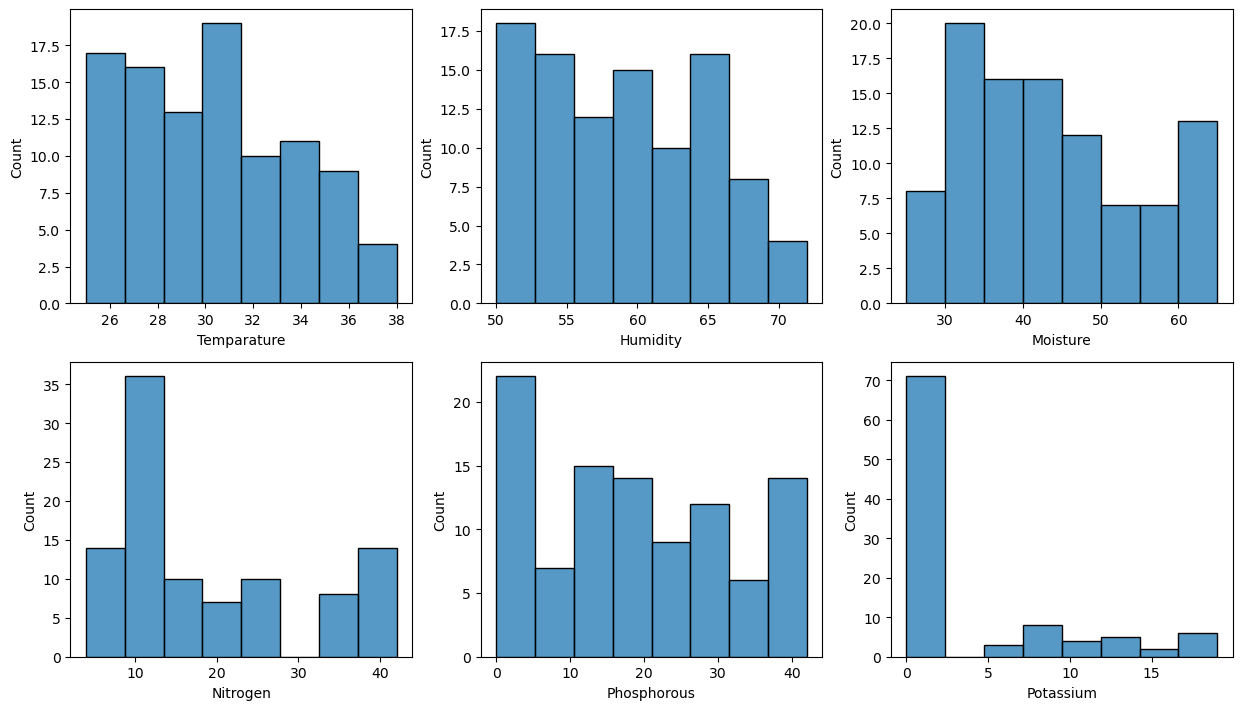

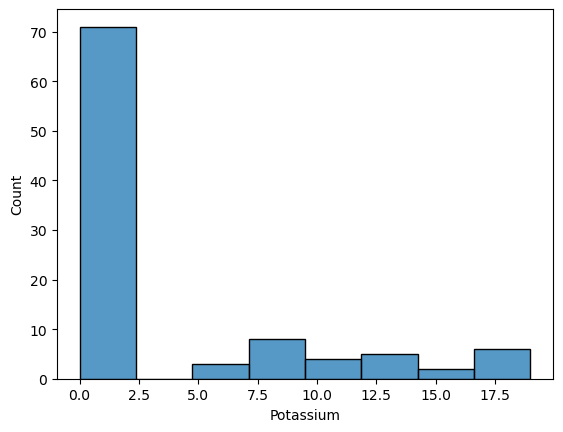

In [72]:
plt.figure(figsize=(15,13))
i = 1
for column in continuous_data_cols:
    plt.subplot(3,3,i)
    sns.histplot(data[column])
    i+=1
plt.show()

sns.histplot(data[continuous_data_cols[-1]])
plt.show()

<Figure size 2100x1700 with 0 Axes>

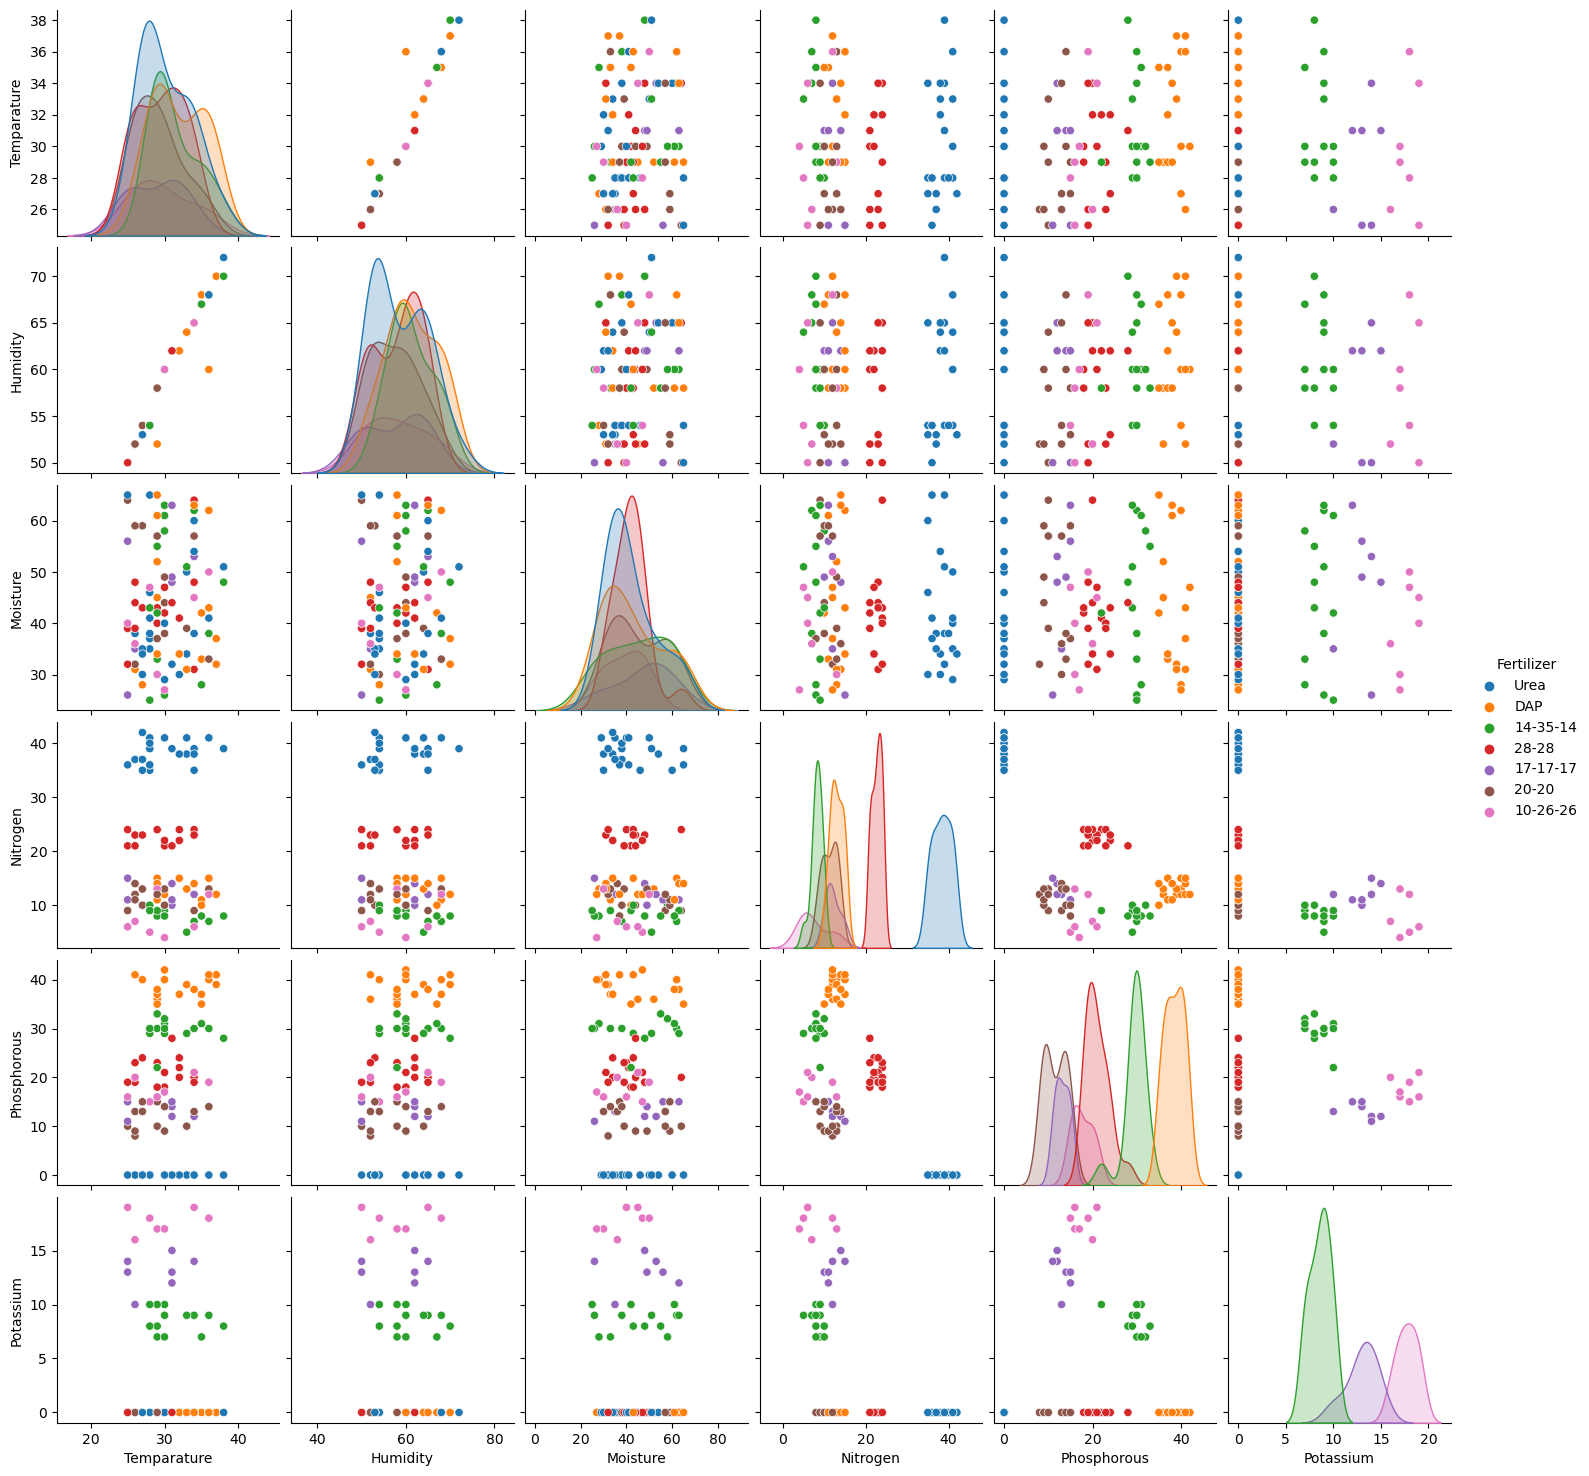

In [73]:
plt.figure(figsize=(21,17))
sns.pairplot(data[continuous_data_cols + ["Fertilizer"]], hue = "Fertilizer")
plt.show()

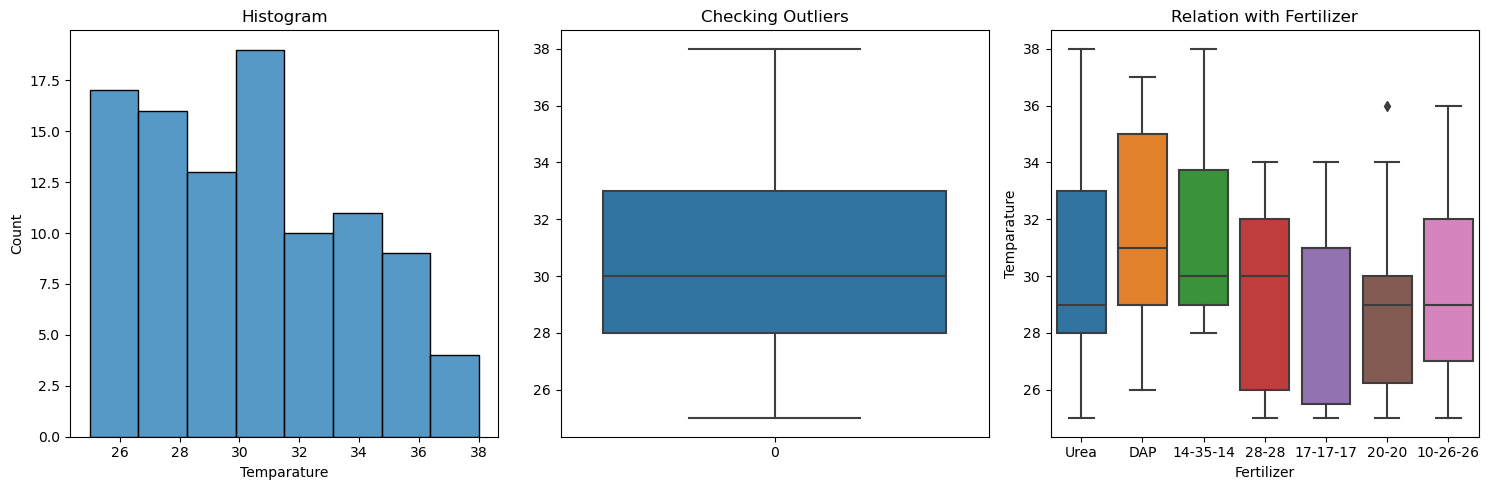

In [74]:
#EDA - Temparature variable
plot_continuous(data.Temparature)

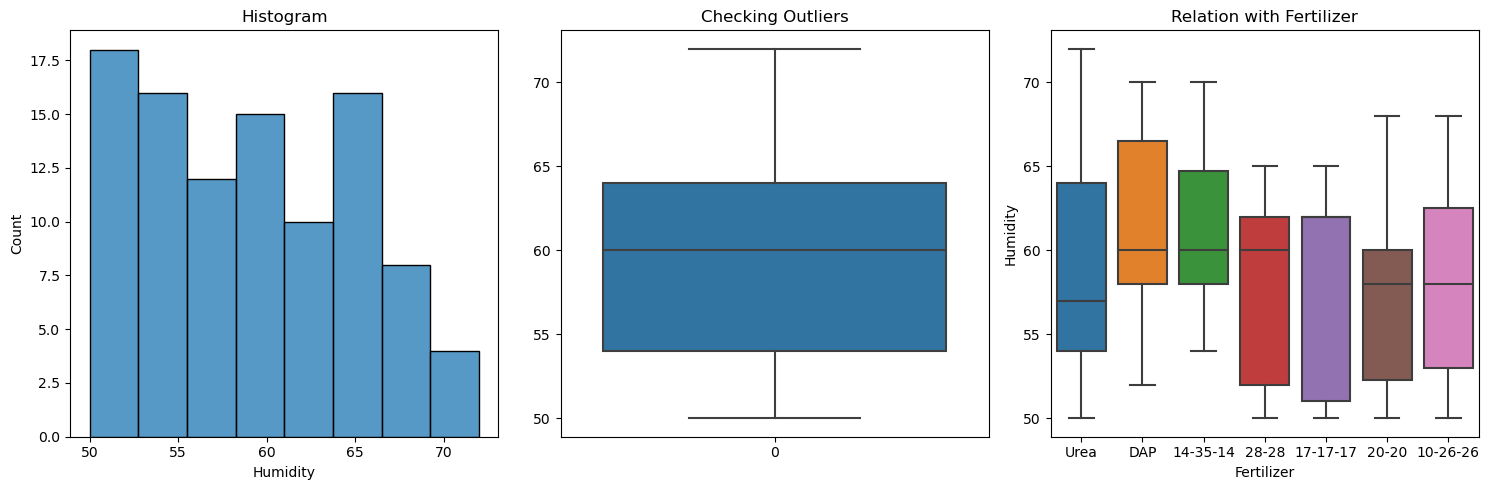

In [75]:
#EDA - Humidity variable
plot_continuous(data.Humidity)

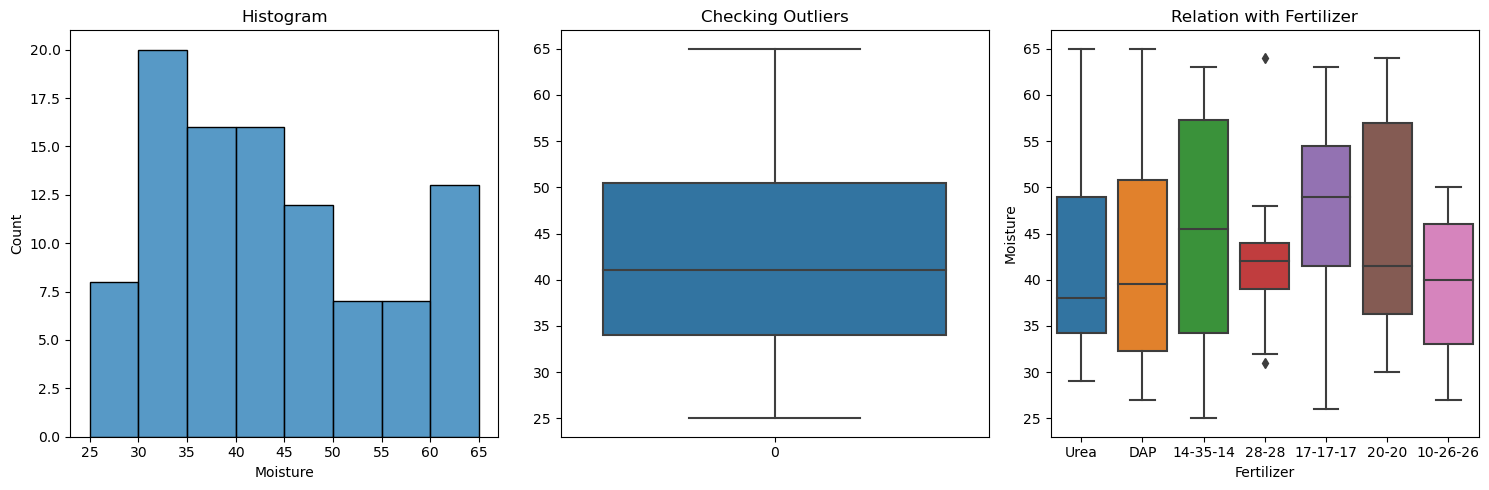

In [76]:
#EDA - Moisture variable
plot_continuous(data.Moisture)

***Plotting Catagorical Variable (temp humidity , moisture etc)***

<Axes: xlabel='Soil_Type', ylabel='Temparature'>

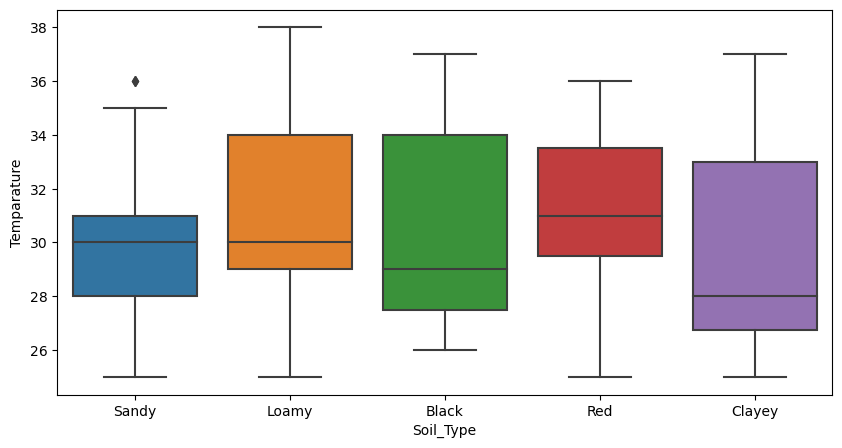

In [77]:
#relation of soil type with Temperature 
plt.figure(figsize=(10,5))
sns.boxplot(x=data.Soil_Type,y=data.Temparature)

<Axes: xlabel='Soil_Type', ylabel='Temparature'>

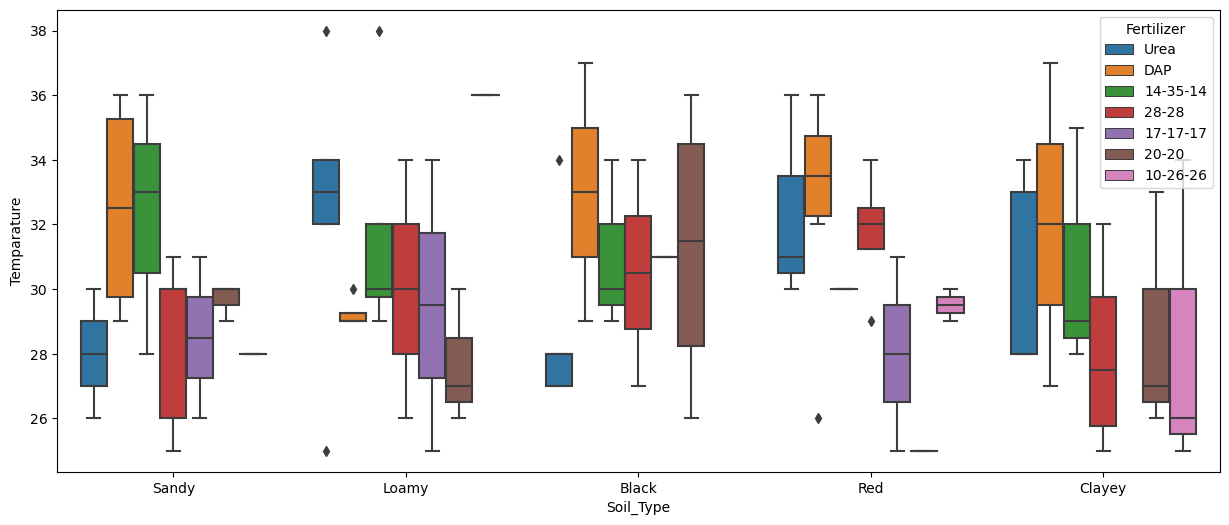

In [78]:
#relation of soil type and Temperature with output variable
plt.figure(figsize=(15,6))
sns.boxplot(x=data.Soil_Type,y=data.Temparature,hue=data.Fertilizer)

<Axes: xlabel='Crop_Type', ylabel='Temparature'>

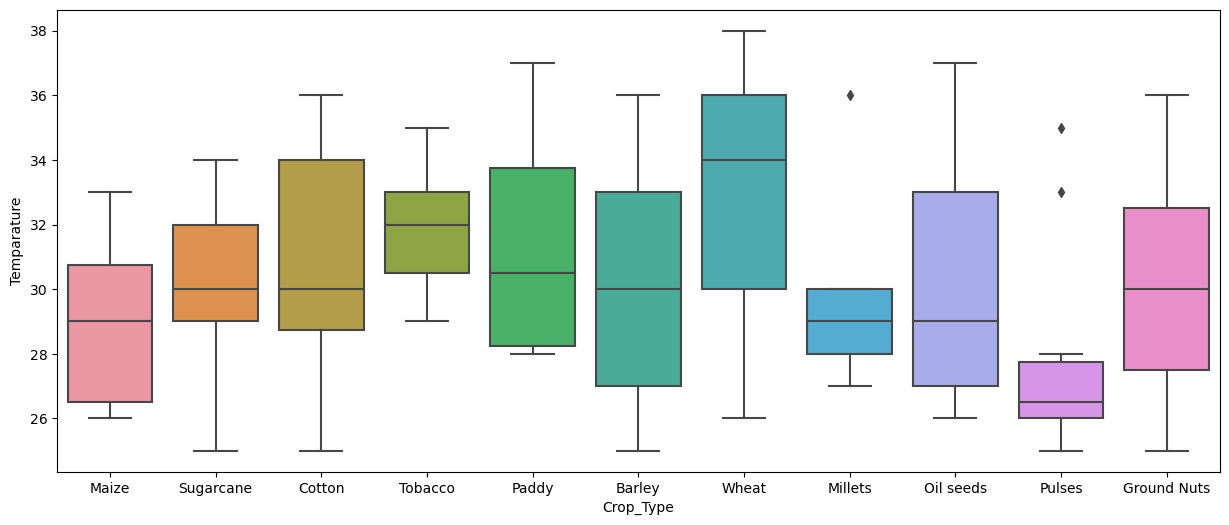

In [79]:
#relation of crop type with temperature
plt.figure(figsize=(15,6))
sns.boxplot(x=data.Crop_Type,y=data.Temparature)

<Axes: xlabel='Crop_Type', ylabel='Humidity'>

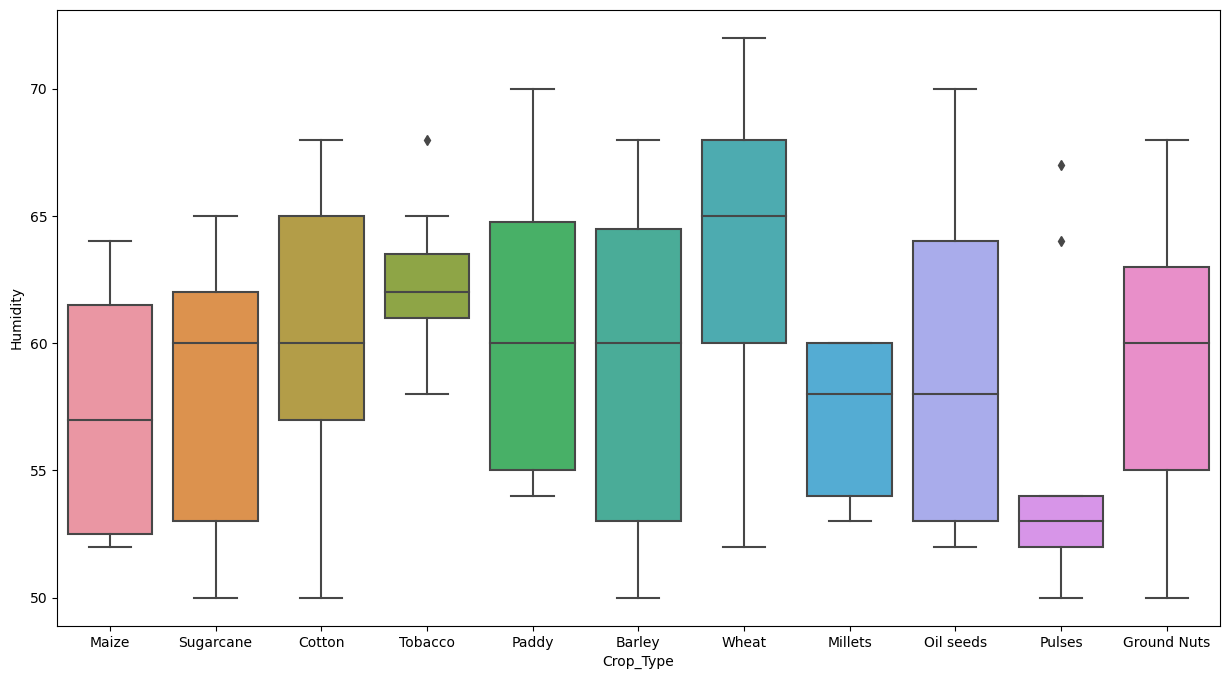

In [80]:
#relation of crop type with Humidity
plt.figure(figsize=(15,8))
sns.boxplot(x=data.Crop_Type,y=data.Humidity)

<Axes: xlabel='Crop_Type', ylabel='Nitrogen'>

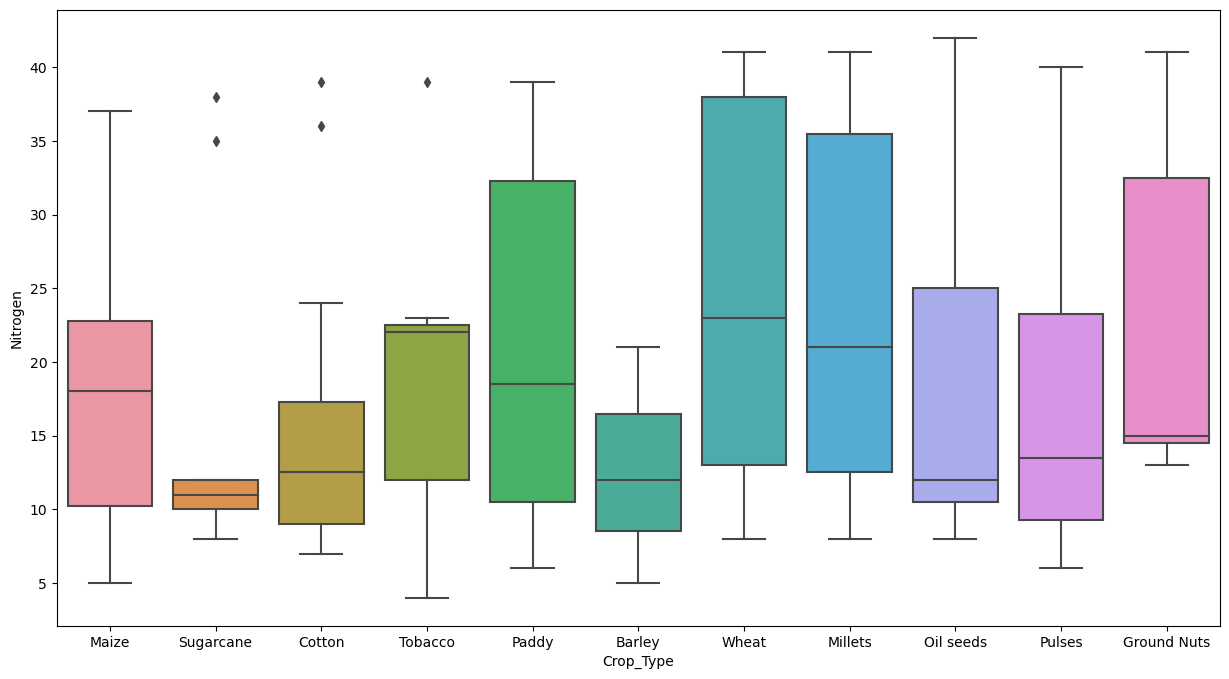

In [81]:
#relation of nitrogen wrt to crop type
plt.figure(figsize=(15,8))
sns.boxplot(x=data.Crop_Type,y=data.Nitrogen)

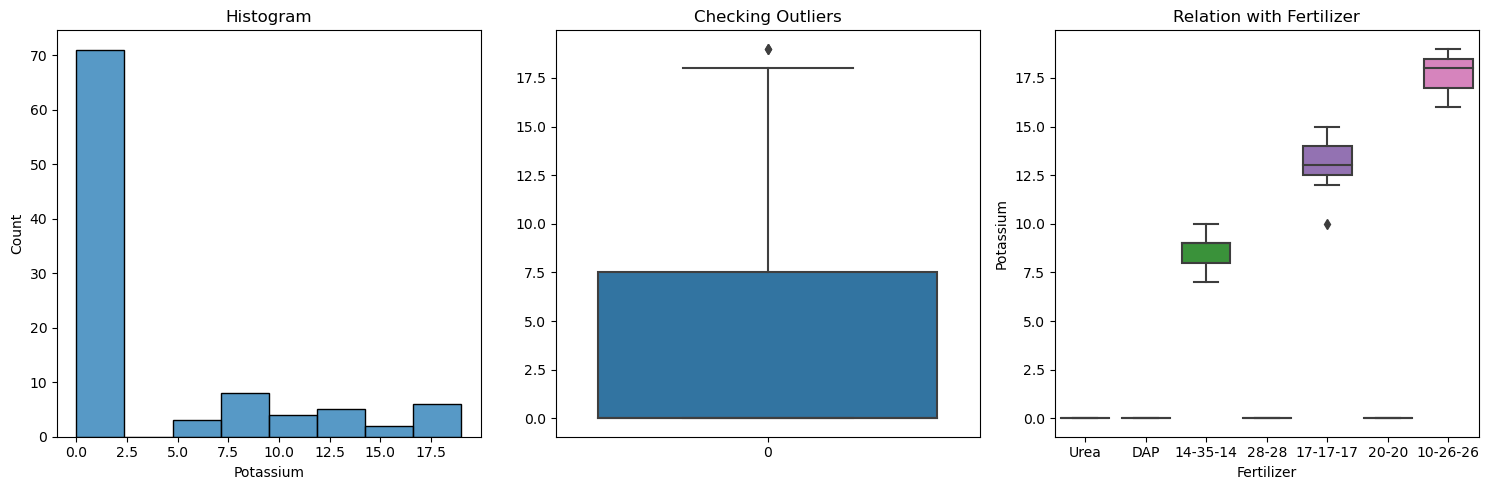

In [82]:
#EDA - Potassium variable
plot_continuous(data.Potassium)

# Data Preprocessing

In [83]:
#encoding the labels for categorical variables
from sklearn.preprocessing import LabelEncoder,StandardScaler


In [84]:
data1 = data.copy()

In [85]:
#encoding Soil Type variable
encode_soil = LabelEncoder()
encode_crop = LabelEncoder()
encode_ferti = LabelEncoder()

#fitting the label encoder
data1.Soil_Type = encode_soil.fit_transform(data.Soil_Type)
data1.Crop_Type = encode_crop.fit_transform(data.Crop_Type)
data1.Fertilizer = encode_ferti.fit_transform(data.Fertilizer)

In [86]:
data1.head()

,Temparature,Humidity,Moisture,Soil_Type,Crop_Type,Nitrogen,Potassium,Phosphorous,Fertilizer
0,26,52,38,4,3,37,0,0,6
1,29,52,45,2,8,12,0,36,5
2,34,65,62,0,1,7,9,30,1
3,32,62,34,3,9,22,0,20,4
4,28,54,46,1,6,35,0,0,6


# Random Sampling To increase Dataset

In [87]:
X = data1.drop('Fertilizer',axis=1)
y = data1['Fertilizer']

In [88]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)

X_resampled, y_resampled = smote.fit_resample(X, y)

In [89]:
print(f"Total Data befor sampling: {len(X)}")
print(f"Total Data after sampling: {len(X_resampled)}")

Total Data befor sampling: 99
Total Data after sampling: 154


# Splitting the data into train and test


In [106]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split( X_resampled.values, y_resampled.values,test_size=0.2,random_state=1)
print('Shape of Splitting :')
print('x_train = {},\ny_train = {},\nx_test = {},\ny_test = {}'.format(x_train.shape,y_train.shape,x_test.shape,y_test.shape))

Shape of Splitting :
x_train = (123, 8),
y_train = (123,),
x_test = (31, 8),
y_test = (31,)


# Grid Search for best model and hyperparameter

In [92]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline


In [93]:
# Define models to compare
models_grid = [
      (
        'Random Forest',
        RandomForestClassifier() , 
           {
    'n_estimators':[350,400],
    'max_depth':[2,3],
    'min_samples_split':[2,5,8]
                
        }),
    (
        'DecisionTreClassifier' ,
        DecisionTreeClassifier(),
         {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    } 
    ),
    
    (
        'Logistic Regression',
        LogisticRegression(),
        {'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300],
        }
    ),
    
    (
        'SVM',
        SVC(),
        {
    'C': [0.1, 1],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 4],
}
    )
]

 


In [109]:
# evaluation metric 
scoring = 'accuracy'
results = {}

for model_name, model ,param_grid in models_grid :
    
    
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=2 , verbose = 1)
    grid_search.fit(x_train, y_train)
    
    # Get the best hyperparameters and model
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    # Evaluate the best model on the test set
    test_score = best_model.score(x_test, y_test)
    
    print( '-------' , model_name , '-----------')
    print('Best Parameters : ' , best_params)
    print('test Score : ' ,test_score)
    print('\n')
    
    results[model_name] =  {'model' : model  ,'best_params' : best_params  ,"test_score" : test_score}


Fitting 2 folds for each of 12 candidates, totalling 24 fits
------- Random Forest -----------
Best Parameters :  {'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 400}
test Score :  1.0


Fitting 2 folds for each of 24 candidates, totalling 48 fits
------- DecisionTreClassifier -----------
Best Parameters :  {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 5, 'splitter': 'random'}
test Score :  1.0


Fitting 2 folds for each of 12 candidates, totalling 24 fits
------- Logistic Regression -----------
Best Parameters :  {'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
test Score :  1.0


Fitting 2 folds for each of 16 candidates, totalling 32 fits
------- SVM -----------
Best Parameters :  {'C': 0.1, 'degree': 2, 'kernel': 'linear'}
test Score :  1.0




In [110]:
for k,v in results.items():
    print(k  )
    print('best param : ' , v["best_params"])
    print('test score : ' , v["test_score"])    
    print('--------------')

Random Forest
best param :  {'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 400}
test score :  1.0
--------------
DecisionTreClassifier
best param :  {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 5, 'splitter': 'random'}
test score :  1.0
--------------
Logistic Regression
best param :  {'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
test score :  1.0
--------------
SVM
best param :  {'C': 0.1, 'degree': 2, 'kernel': 'linear'}
test score :  1.0
--------------


* ***Best Model : RandomForest***
* ***Test Accuracy : 0.97***
* ***Best Param : {{'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 350}}***

In [111]:
best_model = results['Random Forest']['model'] 
best_param = results['Random Forest']['best_params'] 

In [98]:
best_param

{'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 350}

In [117]:
RF = RandomForestClassifier( max_depth = 3, min_samples_split = 2, n_estimators  =  400 ) 
RF.fit(x_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=400)

In [118]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [119]:
# Accuray On Test Data
predictions = RF.predict(x_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy on Test Data: {accuracy*100}%")

Accuracy on Test Data: 100.0%


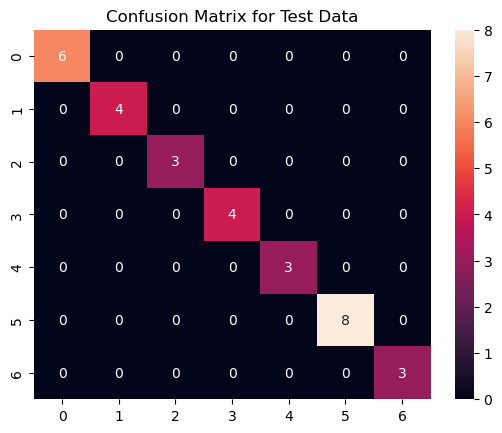

In [120]:
sns.heatmap(confusion_matrix(y_test, predictions), annot = True)
plt.title("Confusion Matrix for Test Data")
plt.show()

In [115]:
# Accuray On Whole Data
predictions = RF.predict(X.values)
accuracy = accuracy_score(y, predictions)
print(f"Accuracy on Whole Data: {accuracy*100}%")


Accuracy on Whole Data: 100.0%


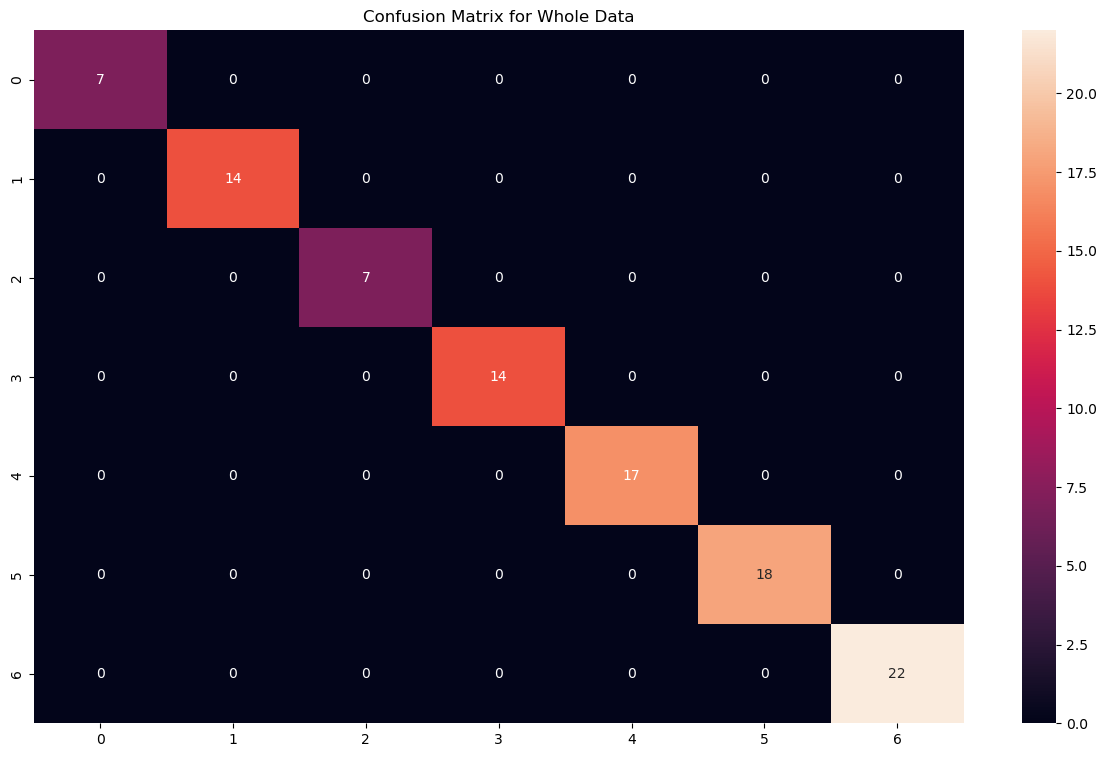

In [116]:
plt.figure(figsize = (15,9))
sns.heatmap(confusion_matrix(y, predictions), annot = True)
plt.title("Confusion Matrix for Whole Data")
plt.show()

# Saving Model and Encode

In [121]:
#pickling the file
import joblib
joblib.dump(RF , './saved_model/RF_Model.pkl')
joblib.dump(encode_crop , './saved_model/encode_crop.pkl')
joblib.dump(encode_soil , './saved_model/encode_soil.pkl')
joblib.dump(encode_ferti , './saved_model/encode_ferti.pkl')

['./saved_model/encode_ferti.pkl']

# Applying ourmodel on real

In [122]:
ferti_encode = joblib.load('./saved_model/encode_ferti.pkl')
crop_encode = joblib.load('./saved_model/encode_crop.pkl')
soil_encode = joblib.load('./saved_model/encode_soil.pkl')
model = joblib.load('./saved_model/RF_Model.pkl')

In [123]:
ferti_encode.classes_

array(['10-26-26', '14-35-14', '17-17-17', '20-20', '28-28', 'DAP',
       'Urea'], dtype=object)

In [124]:
data.iloc[0 , :]

Temparature       26
Humidity          52
Moisture          38
Soil_Type      Sandy
Crop_Type      Maize
Nitrogen          37
Potassium          0
Phosphorous        0
Fertilizer      Urea
Name: 0, dtype: object

In [125]:
feature = {
    "Temparature"        :   26,
"Humidity"             : 52,
"Moisture"             : 38,
"Soil Type"          : "Sandy",
"Crop Type"         : "Maize",
"Nitrogen"           :   37,
"Potassium"         :     0,
"Phosphorous"         :   0
}
label_true =  "Urea"

In [126]:
feature_new = feature

In [127]:
feature_new['Soil Type'] = soil_encode.transform([feature['Soil Type']])[0]
feature_new['Crop Type'] = crop_encode.transform([feature['Crop Type']])[0]

In [128]:
feature_new 

{'Temparature': 26,
 'Humidity': 52,
 'Moisture': 38,
 'Soil Type': 4,
 'Crop Type': 3,
 'Nitrogen': 37,
 'Potassium': 0,
 'Phosphorous': 0}

In [129]:
feature_arr = list(feature_new.values())
feature_arr

[26, 52, 38, 4, 3, 37, 0, 0]

In [130]:
pred = model.predict([feature_arr])[0]
pred

6

In [131]:
label_pred = ferti_encode.inverse_transform([pred])[0]
label_pred

'Urea'